<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/05_transfer_learning_series_of_Transfer_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets create a series of TransferLearning Experiments we mean models


In [110]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-09-22 14:32:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 173.194.215.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   139MB/s    in 0.9s    

2025-09-22 14:32:13 (139 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [111]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-22 14:32:13--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-22 14:32:13 (90.6 MB/s) - ‘helper_functions.py.1’ saved [6733/6733]



In [112]:
import tensorflow as tf

In [113]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [114]:
unzip_data('10_food_classes_1_percent.zip')

In [115]:
train_dir='10_food_classes_1_percent/train'
test_dir='10_food_classes_1_percent/test'

In [116]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [117]:
image_shape=(512,512)

In [118]:
# Data Loader
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=32,image_size=image_shape)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',batch_size=32,image_size=image_shape)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [119]:
# create dataset augmentation stage with horizontal flip, rotation,zoom etc
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.Rescale(1./255), only for resnet and like models

],name='augmentation-layer')

Visualize Augmented data and also original images

In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

(np.float64(-0.5), np.float64(499.5), np.float64(599.5), np.float64(-0.5))

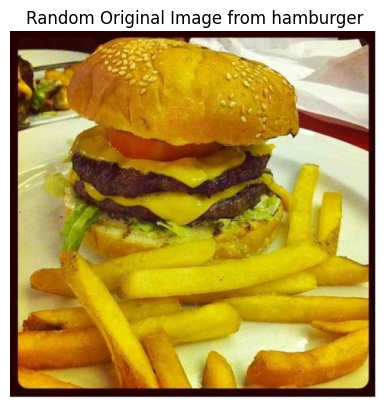

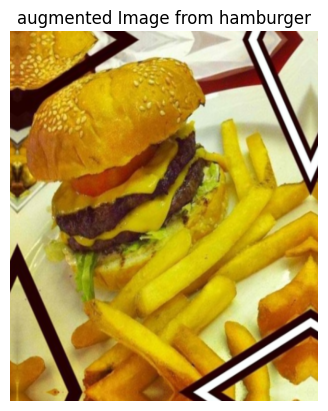

In [121]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf

target_class=random.choice(train_data_1_percent.class_names)
target_dir='10_food_classes_1_percent/train/'+target_class
random_image_name=random.choice(os.listdir(target_dir))
random_image_path=target_dir+'/'+random_image_name

# Load and display the original image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Random Original Image from {target_class}')
plt.axis('off')

# Now lets plot augmented Data
augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title(f'augmented Image from {target_class}')
plt.imshow(tf.squeeze(augmented_img)/255)
plt.axis('off')

Model 1 Feature extraction transfer learning on 1% of the data

In [122]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [123]:
input_shape=(512,512,3)

In [124]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Input

In [125]:
inputs=Input(shape=input_shape)
# x=data_augmentation(inputs)
x=base_model(inputs,training=False)
x=GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)
outputs=Dense(10,activation='softmax')(x)

model_1=tf.keras.Model(inputs,outputs)

In [126]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [127]:
model_1.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GlobalAveragePoolingLayer       │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [128]:
model_1_history=model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch=len(train_data_1_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transferlearning",experiment_name="Model1_FE_TF_1PERCENT_data")])

Saving TensorBoard log files to: transferlearning/Model1_FE_TF_1PERCENT_data/20250922-143220
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 11s/step - accuracy: 0.0819 - loss: 2.4058 - val_accuracy: 0.2237 - val_loss: 2.2226
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2718 - loss: 2.0918 - val_accuracy: 0.3076 - val_loss: 2.0858
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4850 - loss: 1.9059 - val_accuracy: 0.3701 - val_loss: 1.9697
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.5969 - loss: 1.7447 - val_accuracy: 0.4638 - val_loss: 1.8629
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7237 - loss: 1.5911 - val_accuracy: 0.5115 - val_loss: 1.7719


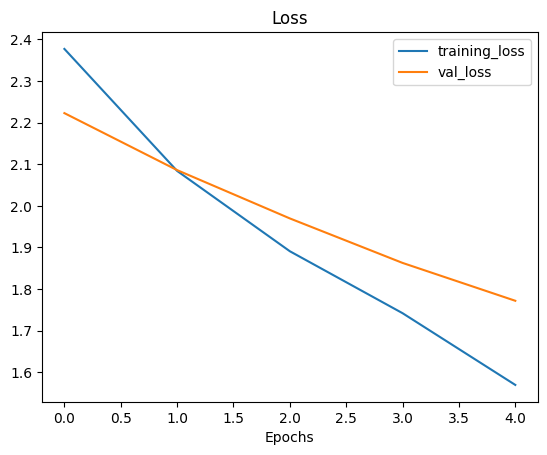

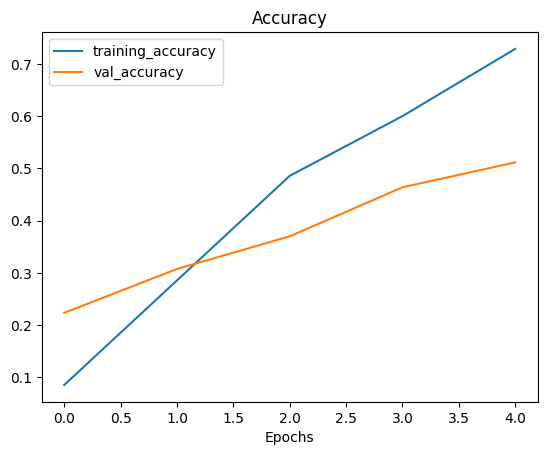

In [129]:
plot_loss_curves(model_1_history)

In [130]:
result_1_percent_data_augmented=model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - accuracy: 0.5148 - loss: 1.7791


In [131]:
result_1_percent_data_augmented

[1.7918009757995605, 0.5016000270843506]

# **Model 2 data augmentation layer with 10 percent training data**

In [132]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-09-22 14:33:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   233MB/s    in 0.7s    

2025-09-22 14:33:51 (233 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [133]:
unzip_data("10_food_classes_10_percent.zip")

In [134]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [135]:
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [136]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [137]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',
                                                                          image_size=IMG_SIZE,batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=BATCH_SIZE,image_size=IMG_SIZE,label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [138]:
# Data Augmentation Layer
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.Rescaling(1./255),
],name='data_augmentation_layer')

In [139]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [140]:
inputs=Input(shape=input_shape,name='InputLayer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)
outputs=Dense(10,activation='softmax',name='Output_Layer')(x)

model_2=tf.keras.Model(inputs,outputs)
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [141]:
model_2.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GlobalAveragePoolingLayer       │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Set CheckPoint to save our models weight during training

In [142]:
check_point_path = "ten_percent_model_checkpoints_weights/checkpoint.weights.h5"

check_point_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=check_point_path,
    save_best_only=False,
    save_weights_only=True,
    save_freq='epoch',
    verbose=1
)


In [143]:
# Fitting and Evaluating Data
initial_epochs=5
history_10_percent_data_aug=model_2.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[check_point_callback])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.0995 - loss: 2.3541
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 315ms/step - accuracy: 0.0988 - loss: 2.3546 - val_accuracy: 0.1053 - val_loss: 2.3171
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0842 - loss: 2.3271
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.0842 - loss: 2.3276 - val_accuracy: 0.1003 - val_loss: 2.3289
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.0815 - loss: 2.3633
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.0816 - loss: 2.3630 - val_accuracy: 0.0970 - val_loss: 2.3204
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0802 - loss: 2.3249
Epoch 4: saving model to ten_percent_model_checkpoint

In [144]:
# fit and evaluate
res_10_percent_data_aug=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.1052 - loss: 2.3120


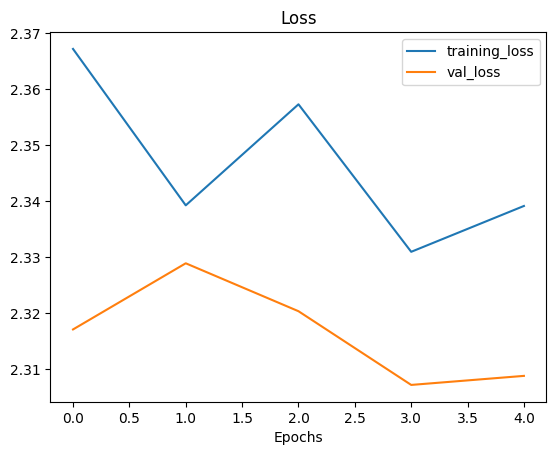

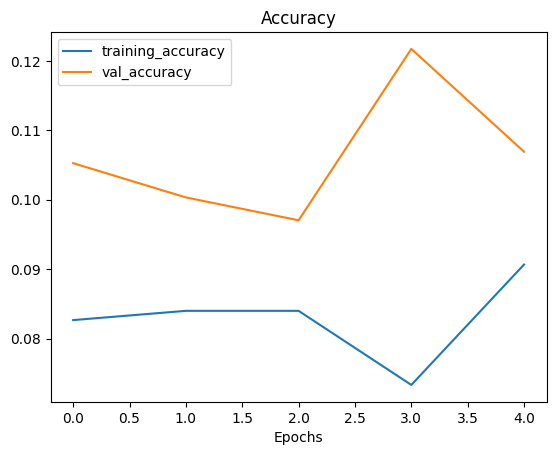

In [145]:
plot_loss_curves(history_10_percent_data_aug)

Loading and comparing saved and trained models weights

In [146]:
model_2.load_weights("/content/ten_percent_model_checkpoints_weights/checkpoint.weights.h5")

In [147]:
loaded_weight_model_results=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.1052 - loss: 2.3114


In [148]:
res_10_percent_data_aug == loaded_weight_model_results

False

In [149]:
res_10_percent_data_aug

[2.3110432624816895, 0.10000000149011612]

In [150]:
loaded_weight_model_results

[2.3110430240631104, 0.10000000149011612]

In [151]:
import numpy as np

In [152]:
from ast import Load
np.isclose(np.array(res_10_percent_data_aug),np.array(loaded_weight_model_results))

array([ True,  True])

Lets Now Start Building

# **MODEL 3 : With Fine Tuning**

In [153]:
#layers in model2
model_2.layers

[<InputLayer name=InputLayer, built=True>,
 <Sequential name=data_augmentation_layer, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=GlobalAveragePoolingLayer, built=True>,
 <Dense name=Output_Layer, built=True>]

In [154]:
# Check If layers are Trainable
for layer in model_2.layers:
    print(layer ,layer.trainable)

<InputLayer name=InputLayer, built=True> True
<Sequential name=data_augmentation_layer, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=GlobalAveragePoolingLayer, built=True> True
<Dense name=Output_Layer, built=True> True


In [155]:
# Chek how many trainable variables are in base model
print(len(model_2.layers[2].trainable_variables))

0


In [156]:

base_model.trainable = True

# Unfreeze only the last 10 layers, freeze the rest
for layer in base_model.layers[:-10]:
    layer.trainable = False


In [157]:
# Recompile Model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                metrics=['accuracy'])

In [158]:
# Check if layers are trainable
for layernumber , layer in enumerate(model_2.layers[2].layers):
  print(layernumber,layer.name,layer.trainable)

0 input_layer_9 False
1 rescaling_10 False
2 normalization_4 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_sque

In [159]:
print(len(model_2.trainable_variables))

12


In [160]:
fine_tune_epochs=initial_epochs+5

In [161]:
fine_tune_epochs

10

In [162]:
# Refit the model

history_fine_tune_10_percent_data_aug=model_2.fit(train_data_10_percent,epochs=fine_tune_epochs,
                                                  steps_per_epoch=len(train_data_10_percent),
                                                  validation_data=test_data,
                                                  validation_steps=int(0.25*len(test_data)),
                                                  initial_epoch=history_10_percent_data_aug.epoch[-1],callbacks=[check_point_callback]
                                                  )

Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.1088 - loss: 2.3498
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.1087 - loss: 2.3500 - val_accuracy: 0.1003 - val_loss: 2.3122
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.0763 - loss: 2.3352
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.0765 - loss: 2.3354 - val_accuracy: 0.1020 - val_loss: 2.3094
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.1023 - loss: 2.3497
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.1021 - loss: 2.3496 - val_accuracy: 0.1036 - val_loss: 2.3075
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.1136 - loss: 2.3340
Epoch 8: saving model to ten_percent_model_check

In [163]:
res_fine_tune_10_percent=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.0971 - loss: 2.3072


Lets try again to build model3

In [164]:
from tensorflow.keras import Input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

input_shape = (224,224,3)

# Load pretrained EfficientNetB0
base_model = tf.keras.applications.EfficientNetB0(include_top=False,
                                                  weights='imagenet')
base_model.trainable = False  # Freeze at first

inputs = Input(shape=input_shape, name='InputLayer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)
x = Dropout(0.3)(x)  # regularization
outputs = Dense(10, activation='softmax', name='Output_Layer')(x)

model_2 = Model(inputs, outputs)

model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # or SparseCategoricalCrossentropy()
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)
base_model.trainable = True
for layer in base_model.layers[:-20]:  # freeze all except last 20
    layer.trainable = False

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
# Train only the top classifier first
history = model_2.fit(
    train_data_10_percent,
    validation_data=test_data,
    epochs=5,          # small number to warm up top layers
    verbose=1
)


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 671ms/step - accuracy: 0.0730 - loss: 2.3652 - val_accuracy: 0.1000 - val_loss: 2.3130
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.0918 - loss: 2.3397 - val_accuracy: 0.1000 - val_loss: 2.3093
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 549ms/step - accuracy: 0.1150 - loss: 2.3319 - val_accuracy: 0.1000 - val_loss: 2.3068
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 557ms/step - accuracy: 0.0895 - loss: 2.3308 - val_accuracy: 0.1000 - val_loss: 2.3062
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step - accuracy: 0.0872 - loss: 2.3624 - val_accuracy: 0.1000 - val_loss: 2.3064


In [165]:
# Unfreeze some of the deeper layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:  # freeze all except last 20 layers
    layer.trainable = False

# Recompile with lower learning rate for fine-tuning
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Continue training (fine-tuning)
fine_tune_history = model_2.fit(
    train_data_10_percent,
    validation_data=test_data,
    epochs=10,         # more epochs for fine-tuning
    verbose=1
)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 661ms/step - accuracy: 0.0925 - loss: 2.3314 - val_accuracy: 0.1040 - val_loss: 2.3073
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.0805 - loss: 2.3475 - val_accuracy: 0.1320 - val_loss: 2.3084
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 560ms/step - accuracy: 0.1090 - loss: 2.3311 - val_accuracy: 0.1052 - val_loss: 2.3090
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 344ms/step - accuracy: 0.1018 - loss: 2.3264 - val_accuracy: 0.1000 - val_loss: 2.3093
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 568ms/step - accuracy: 0.0806 - loss: 2.3523 - val_accuracy: 0.1000 - val_loss: 2.3099
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 0.0650 - loss: 2.3344 - val_accuracy: 0.1000 - val_loss: 2.3108
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.1142 - loss: 2.3407 - val_accuracy: 0.1000 - val_loss: 2.3118
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.0892 - loss: 2.3344 - val_accura

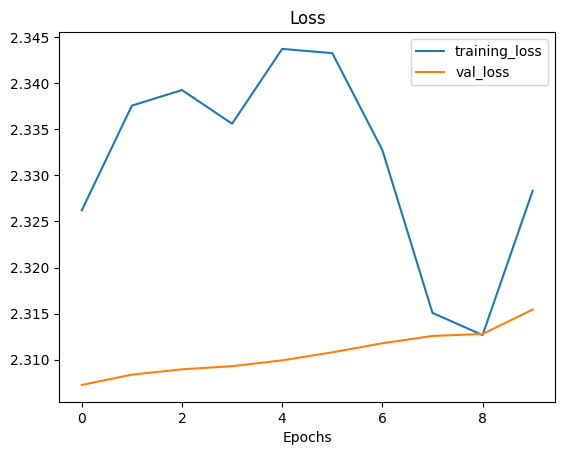

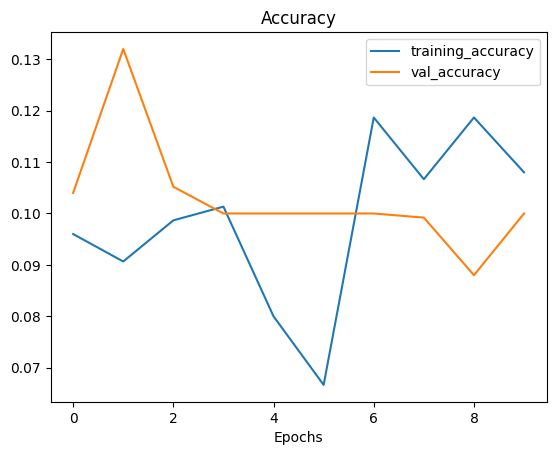

In [166]:
plot_loss_curves(fine_tune_history)

Lets Create a Function to comapre histories

In [167]:
def compare_histories(original_history,new_history,initial_epochs=5):

    acc=original_history.history['accuracy']
    loss=original_history.history['loss']

    val_acc=original_history.history['val_accuracy']
    val_loss=original_history.history['val_loss']

    total_acc=acc + new_history.history['accuracy']
    total_val_acc=val_acc + new_history.history['val_accuracy']

    # Plot Figure
    plt.figure(figsize=(8,8))
    plt.plot(acc,label='Training Accuracy')
    plt.plot(val_acc,label='Validation Accuracy')
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Fine Tuning Starts')
    plt.legend()

    # Plot Figure

    plt.figure(figsize=(8,8))
    plt.plot(loss,label='Training Loss')
    plt.plot(val_loss,label='Validation Loss')
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Fine Tunning Starts')
    plt.legend()

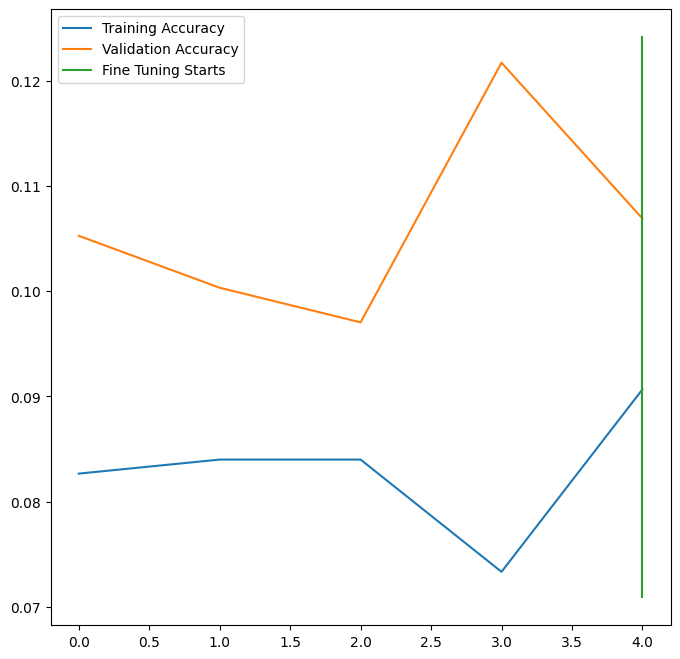

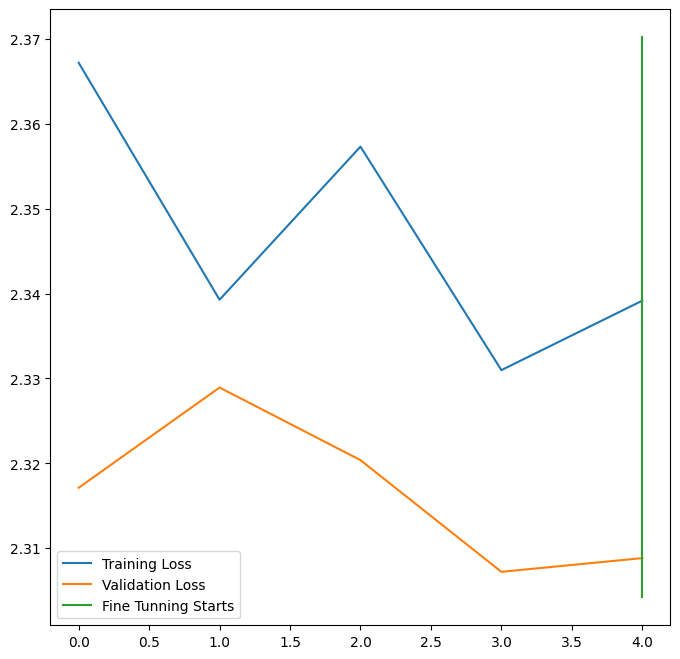

In [168]:
compare_histories(history_10_percent_data_aug,history_fine_tune_10_percent_data_aug)

Lets Now Build Model 4 : 10 food classes 100 % training data

In [169]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2025-09-22 14:39:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 173.194.217.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   219MB/s    in 2.3s    

2025-09-22 14:39:48 (219 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [170]:
unzip_data("10_food_classes_all_data.zip")

In [171]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [172]:
train_dir='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [173]:
train_data_all=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=32,image_size=(224,224))
test_data_all=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',batch_size=32,image_size=(224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [174]:
model_2.load_weights(check_point_path)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 44 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [175]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.0983 - loss: 2.3074


[2.3063414096832275, 0.10000000149011612]

In [176]:
res_10_percent_data_aug

[2.3110432624816895, 0.10000000149011612]

In [177]:
for layer_number,layer in enumerate(model_2.layers):
    print(layer_number,layer.name,layer.trainable)

0 InputLayer True
1 data_augmentation_layer True
2 efficientnetb0 True
3 GlobalAveragePoolingLayer True
4 dropout_1 True
5 Output_Layer True


In [178]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

0 input_layer_11 False
1 rescaling_12 False
2 normalization_5 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squ

In [179]:
# Recompile Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [180]:
fine_tune_epochs=initial_epochs+5

In [186]:
history_all_data_fine_tune_epochs=model_2.fit(train_data_all,epochs=fine_tune_epochs,
                                                  steps_per_epoch=len(train_data_all),
                                                  validation_data=test_data,
                                                  validation_steps=int(0.25*len(test_data)),
                                                  initial_epoch=history_10_percent_data_aug.epoch[-1])

Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.1031 - loss: 0.3283 - val_accuracy: 0.0987 - val_loss: 0.3442
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - accuracy: 0.0935 - loss: 0.3281 - val_accuracy: 0.1003 - val_loss: 0.3403
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - accuracy: 0.1063 - loss: 0.3272 - val_accuracy: 0.0987 - val_loss: 0.3387
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.1092 - loss: 0.3273 - val_accuracy: 0.0938 - val_loss: 0.3329
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - accuracy: 0.1024 - loss: 0.3273 - val_accuracy: 0.1266 - val_loss: 0.3313
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - accuracy: 0.0976 - loss: 0.3268 - val_accuracy: 0.0839 - val_loss: 0.3345


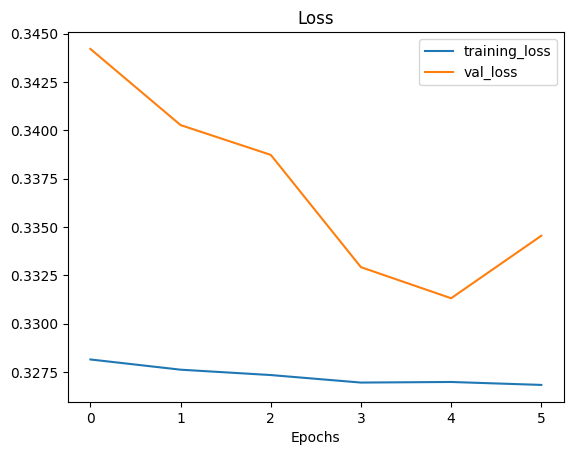

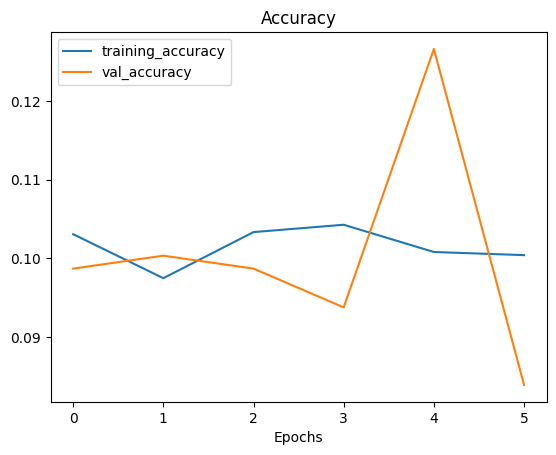

In [187]:
plot_loss_curves(history_all_data_fine_tune_epochs)

In [188]:
# Evaluate on all test data
results_fine_tune_full_data=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.0899 - loss: 0.3347


In [190]:
hist_history_all_data_fine_tune_epochs=model_2.fit(train_data_all,epochs=fine_tune_epochs,
                                                  steps_per_epoch=len(train_data_all),
                                                  validation_data=test_data,
                                                  validation_steps=int(0.25*len(test_data)),
                                                  initial_epoch=model_1_history.epoch[-1])

Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - accuracy: 0.1104 - loss: 0.3267 - val_accuracy: 0.1168 - val_loss: 0.3272
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - accuracy: 0.1042 - loss: 0.3267 - val_accuracy: 0.0888 - val_loss: 0.3273
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - accuracy: 0.1039 - loss: 0.3265 - val_accuracy: 0.0839 - val_loss: 0.3278
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.0960 - loss: 0.3265 - val_accuracy: 0.0970 - val_loss: 0.3279
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - accuracy: 0.1042 - loss: 0.3264 - val_accuracy: 0.0839 - val_loss: 0.3280
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.0998 - loss: 0.3262 - val_accuracy: 0.1118 - val_loss: 0.3268
